# 問1: 決定木による他クラス分類

### パッケージのインポート

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline

### データセットの準備

In [2]:
covtype = fetch_covtype()
X = covtype.data
y = covtype.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### 決定木のハイパーパラメータの調整

In [3]:
clf = DecisionTreeClassifier(random_state=1)
param_grid = {'max_depth': range(5, 35)}
clf = GridSearchCV(clf, param_grid, cv=5, return_train_score=True).fit(X_train, y_train)

In [4]:
print('Best parameter (depth): ', clf.best_params_)
print('- Mean of the test score: ', clf.best_score_)
print('- Std of the test score: ', clf.cv_results_['std_test_score'][clf.best_index_])

Best parameter (depth):  {'max_depth': 34}
- Mean of the test score:  0.9320710248675936
- Std of the test score:  0.0010693902484073463


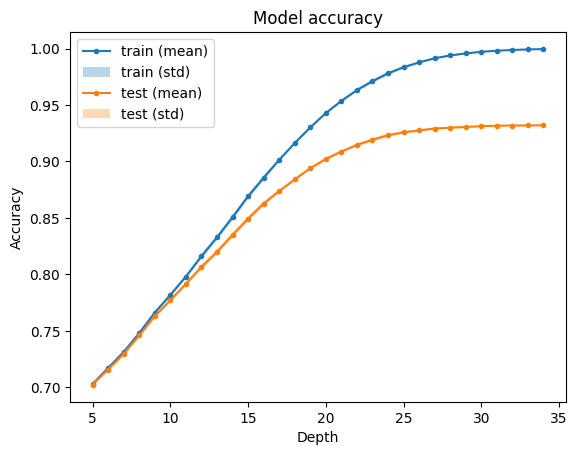

In [5]:
depths = param_grid['max_depth']
mean_train_scores = clf.cv_results_['mean_train_score']
std_train_scores = clf.cv_results_['std_train_score']
mean_test_scores = clf.cv_results_['mean_test_score']
std_test_scores = clf.cv_results_['std_train_score']
alpha = 0.3

plt.plot(depths, mean_train_scores, marker='.')
plt.fill_between(depths, mean_train_scores + std_train_scores, mean_train_scores - std_train_scores, alpha=alpha)
plt.plot(depths, mean_test_scores, marker='.')
plt.fill_between(depths, mean_test_scores + std_test_scores, mean_test_scores - std_test_scores, alpha=alpha)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.legend(['train (mean)', 'train (std)', 'test (mean)', 'test (std)'])

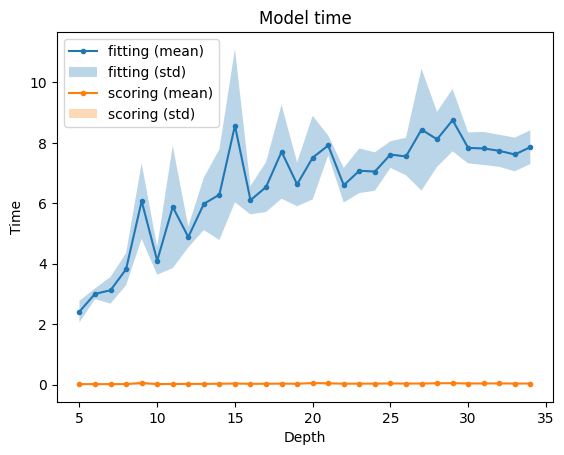

In [6]:
plt.plot(depths, clf.cv_results_['mean_fit_time'], marker='.')
plt.fill_between(depths, clf.cv_results_['mean_fit_time'] + clf.cv_results_['std_fit_time'], clf.cv_results_['mean_fit_time'] - clf.cv_results_['std_fit_time'], alpha=alpha)
plt.plot(depths, clf.cv_results_['mean_score_time'], marker='.')
plt.fill_between(depths, clf.cv_results_['mean_score_time'] + clf.cv_results_['std_score_time'], clf.cv_results_['mean_score_time'] - clf.cv_results_['std_score_time'], alpha=alpha)
plt.title('Model time')
plt.ylabel('Time')
plt.xlabel('Depth')
plt.legend(['fitting (mean)', 'fitting (std)', 'scoring (mean)', 'scoring (std)'])

### 最終モデルによる予測

In [7]:
clf_final = DecisionTreeClassifier(max_depth=25, random_state=1).fit(X_train, y_train)
clf_final.score(X_test, y_test)

0.9325662848635577